In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import random

In [ ]:
import pickle

In [ ]:
import plotly.express as px

In [ ]:
import plotly.graph_objects as go

In [ ]:
import plotly.figure_factory as ff

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.ticker as ticker

In [ ]:
from matplotlib.ticker import FixedFormatter, FixedLocator

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
from sklearn.metrics import log_loss, mean_absolute_error, accuracy_score, confusion_matrix, classification_report

In [ ]:
import nltk

In [ ]:
!pip install tldextract

In [ ]:
import tldextract

In [ ]:
from urllib.parse import urlparse

In [ ]:
from nltk.util import ngrams

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams["ps.useafm"] = True

In [ ]:
data = pd.read_csv("Dataset.csv")

In [ ]:
data.head(10)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
5,smilesvoegol.servebbs.org/voegol.php,bad
6,premierpaymentprocessing.com/includes/boleto-2...,bad
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,bad
8,super1000.info/docs,bad
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,bad


No charts were generated by quickchart


In [ ]:
data.sample(10)

,URL,Label
496992,uitindrachten.nl/a55fgn8,bad
470784,youtube.com/watch?v=21GOcJqTaRE,good
242574,sportsillustrated.cnn.com/vault/topic/article/...,good
238565,shalmdi.blogspot.com/2006/03/quick-hits-032906...,good
251035,twitter.com/DP_57/status/132805952029212672,good
496141,cdnimagescache.com/,bad
266806,abortion-pill.org/,good
282295,archive.org/details/josiahharris177000harr,good
363923,italianamericangirl.com/,good
369831,lake-arrowhead-homes-for-sale.com/,good


In [ ]:
def count_digits(string):
    total_number = 0
    for char_ in list(map(str, "0123456789")):
        total_number += string.lower().count(char_)
    return total_number

In [ ]:
def count_letter(string):
    total_letter = 0
    for char_ in list(map(str, "abcdefghijklmnopqrstuvwxyz")):
        total_letter += string.lower().count(char_)
    return total_letter

In [ ]:
features = ["total_digits_domain", "total_digits_path", "total_digits_url",
               "total_letter_domain", "total_letter_path", "total_letter_url",
               "len_domain", "len_url", "len_path"]

In [ ]:
new_data = {"len_domain": [],
            "len_path": [],
            "len_url": [],
            "total_digits_domain": [],
            "total_digits_path": [],
            "total_digits_url": [],
            "total_letter_domain": [],
            "total_letter_path": [],
            "total_letter_url": []}

In [ ]:
for index, current in enumerate(data["URL"]):
    url_split = current.split("/", 1)
    if len(url_split) == 2:
        domain, path = url_split[0], url_split[1]
    else:
        domain, path = url_split[0], ""

    new_data["total_digits_domain"].append(count_digits(domain))
    new_data["total_digits_path"].append(count_digits(path))
    new_data["total_digits_url"].append(count_digits(current))

    new_data["total_letter_domain"].append(count_letter(domain))
    new_data["total_letter_path"].append(count_letter(path))
    new_data["total_letter_url"].append(count_letter(current))

    new_data["len_domain"].append(len(domain))
    new_data["len_path"].append(len(path))
    new_data["len_url"].append(len(current))

In [ ]:
for feature in features:
    data[feature] = new_data[feature]

In [ ]:
data.head(10)

,URL,Label,total_digits_domain,total_digits_path,total_digits_url,total_letter_domain,total_letter_path,total_letter_url,len_domain,len_url,len_path
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0,58,58,8,127,135,9,225,215
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,0,1,1,13,52,65,15,81,65
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0,47,47,15,96,111,16,177,160
3,mail.printakid.com/www.online.americanexpress....,bad,0,0,0,16,36,52,18,60,41
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0,21,21,18,64,82,19,116,96
5,smilesvoegol.servebbs.org/voegol.php,bad,0,0,0,23,9,32,25,36,10
6,premierpaymentprocessing.com/includes/boleto-2...,bad,0,7,7,27,20,47,28,61,32
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,bad,0,4,4,18,27,45,19,60,40
8,super1000.info/docs,bad,4,0,4,9,4,13,14,19,4
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,bad,0,35,35,18,114,132,19,193,173


In [ ]:
def get_histplot_central_tendency(df: dict, fields: list, target: str):
    colors = sns.color_palette('cool')
    for field in fields:
        f, (ax1) = plt.subplots(figsize=(10, 3), dpi=100)
        v_dist_1 = df[field].values

        for spline in ['top', 'right', 'left']:
            ax1.spines[spline].set_visible(False)

        sns.histplot(v_dist_1, ax=ax1, palette=colors, kde=True)

        mean=df[field].mean()
        median=df[field].median()
        mode=df[field].mode().values[0]

        ax1.axvline(mean, color='r', linestyle='--', label="Mean")
        ax1.axvline(median, color='g', linestyle='-', label="Mean")
        ax1.axvline(mode, color='b', linestyle='-', label="Mode")
        ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
        ax1.set_xlabel(f'count', fontsize=13, color = '#333F4B')
        ax1.set_ylabel(f'{field}', fontsize=13, color = '#333F4B')
        ax1.legend()
        plt.grid(False)
        plt.plot(color="white", lw=3)
        f.suptitle(f"Representation Histogram for {field} - {target}", fontsize=18)

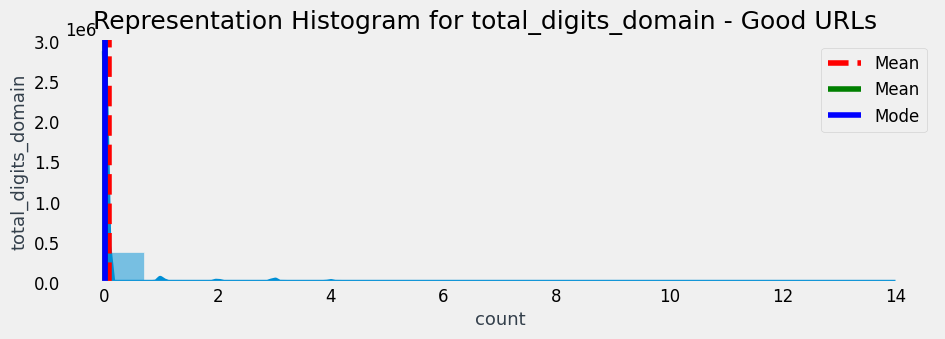

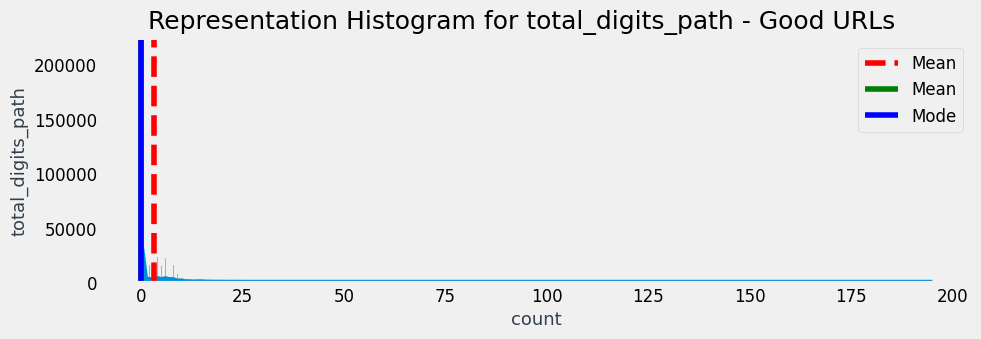

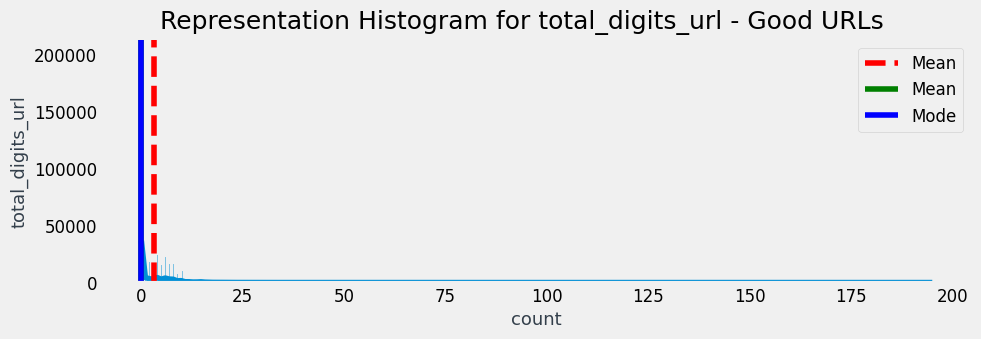

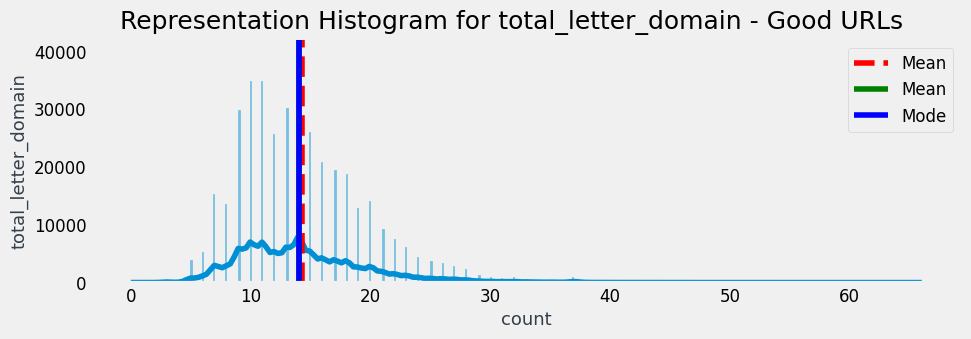

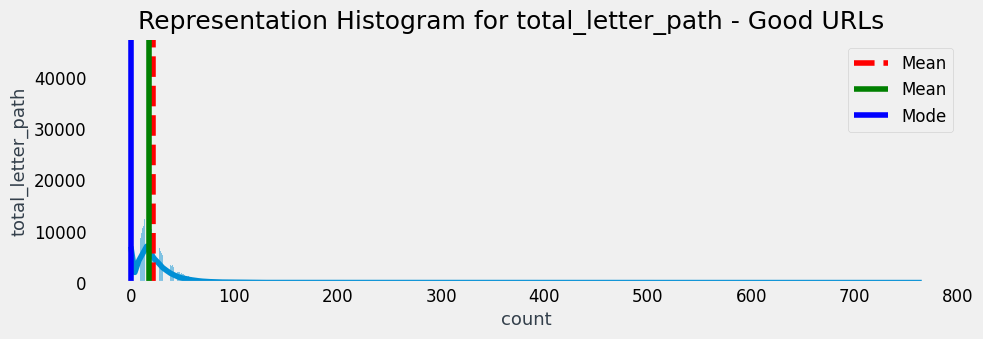

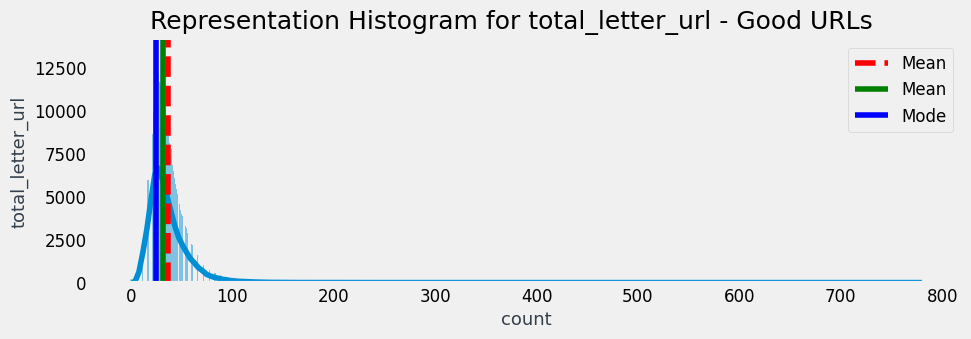

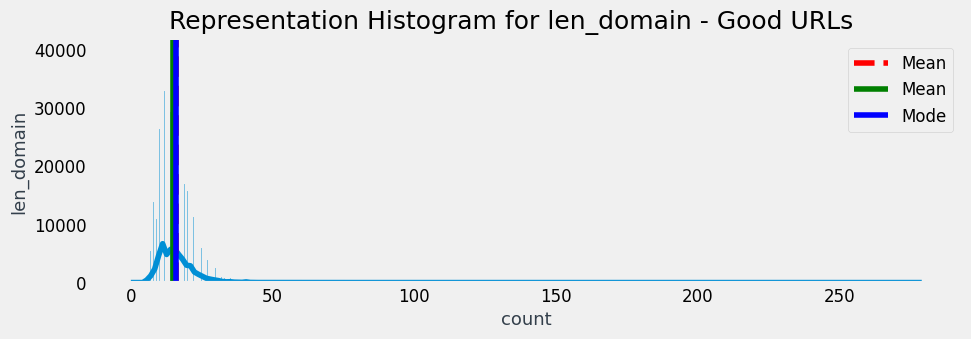

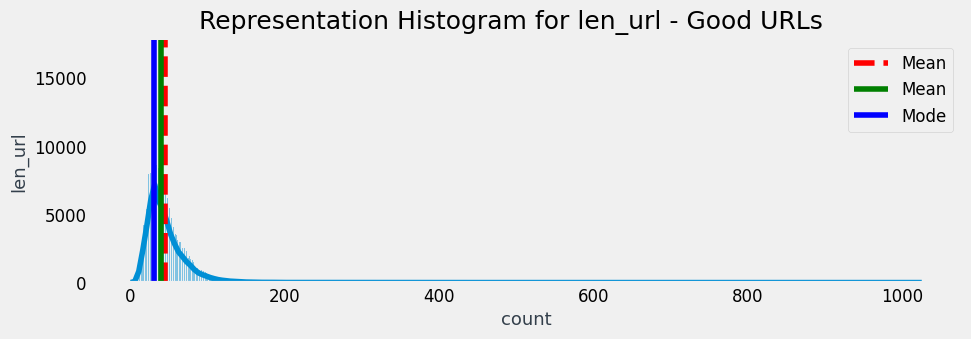

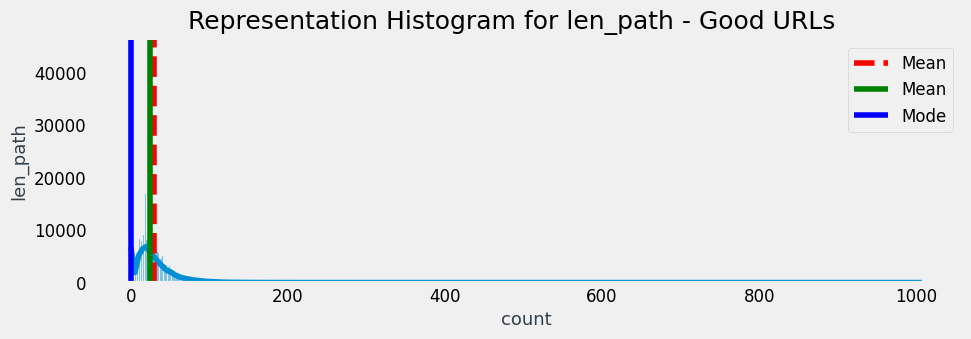

In [ ]:
get_histplot_central_tendency(data.query('Label == "good"'), features, "Good URLs")

In [ ]:
def dict_to_dataframe(dictionary: dict):
    pandas_to = {"name": [], "total": []}
    for name, value in dictionary.items():
        if len(name.replace(" ", "")) > 0:
            pandas_to["name"].append(name)
            pandas_to["total"].append(value)
    return pd.DataFrame(pandas_to).sort_values(by=['total'], ascending=False)

In [ ]:
total_suffix_good = {}
total_suffix_bad = {}

In [ ]:
for current, target in zip(data["URL"], data["Label"]):
    url_tldextract = tldextract.extract(current)
    suffix_tld = url_tldextract.suffix

    if target == "good":
        if suffix_tld not in total_suffix_good:
            total_suffix_good[suffix_tld] = 0
        total_suffix_good[suffix_tld] += 1

    if target == "bad":
        if suffix_tld not in total_suffix_bad:
            total_suffix_bad[suffix_tld] = 0
        total_suffix_bad[suffix_tld] += 1

In [ ]:
df_tld_top_bad = dict_to_dataframe(total_suffix_bad)
df_tld_top_good = dict_to_dataframe(total_suffix_good)

In [ ]:
def bar_plot_data(df: dict, subtitle: str, figsize=(5, 4), inverted_x=True):
    fig, ax1 = plt.subplots(figsize=figsize, dpi=100)

    for spline in ['top', 'right', 'left']:
        ax1.spines[spline].set_visible(False)

    sns.barplot(data=df, palette='cool', x="name", y="total")
    ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
    ax1.set_xlabel(f'{"name"}', fontsize=13, color = '#333F4B')
    ax1.set_ylabel(f'{"count"}', fontsize=13, color = '#333F4B')

    if inverted_x:
        plt.xticks(rotation=90)

    plt.plot(color="white", lw=3)
    fig.suptitle(subtitle, fontsize=18)
    plt.show()

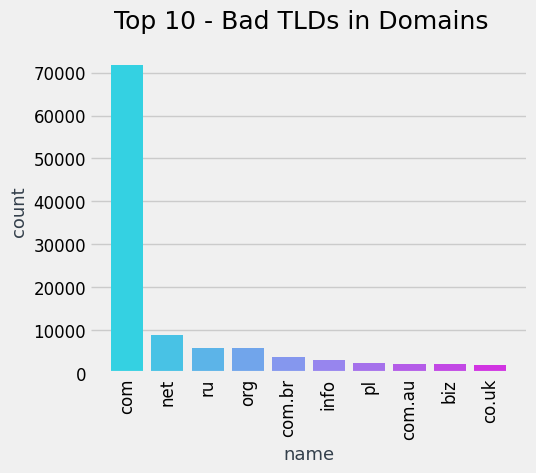

In [ ]:
bar_plot_data(df=df_tld_top_bad.head(10), subtitle="Top 10 - Bad TLDs in Domains")

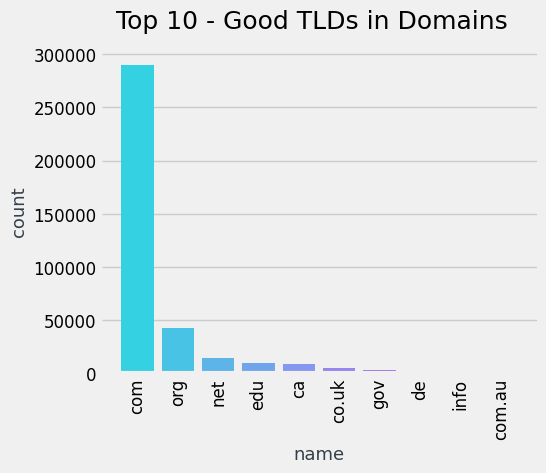

In [ ]:
bar_plot_data(df=df_tld_top_good.head(10), subtitle="Top 10 - Good TLDs in Domains")

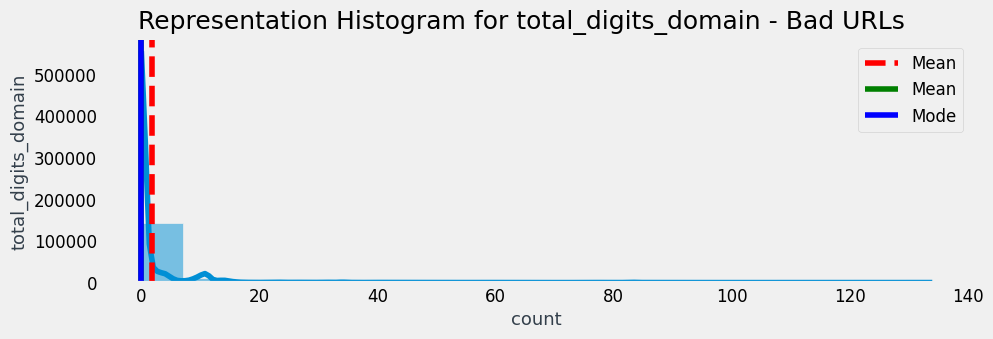

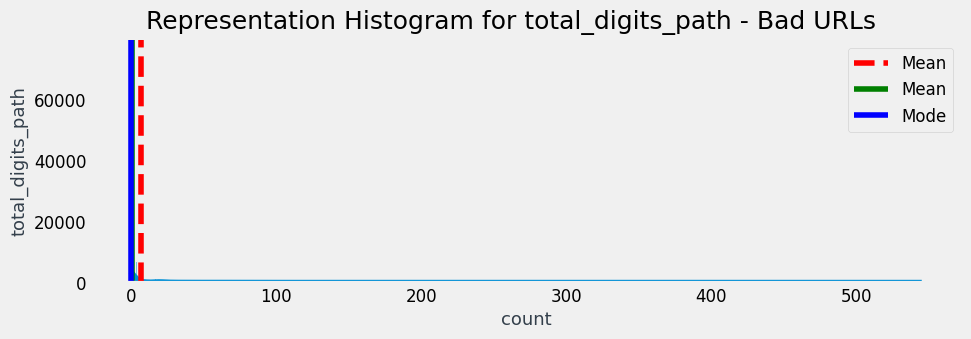

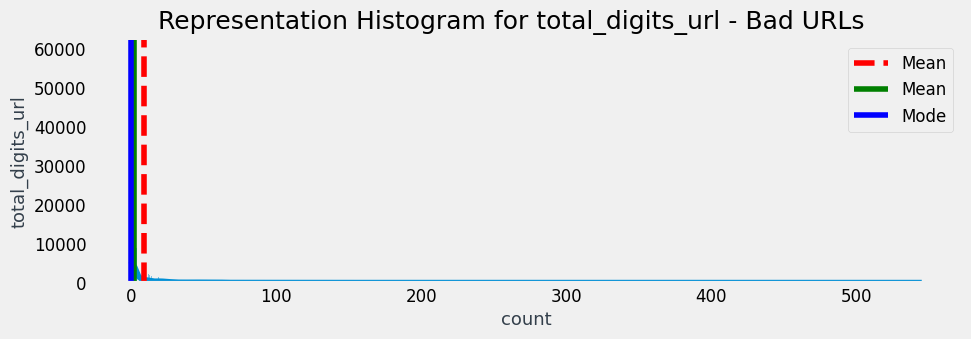

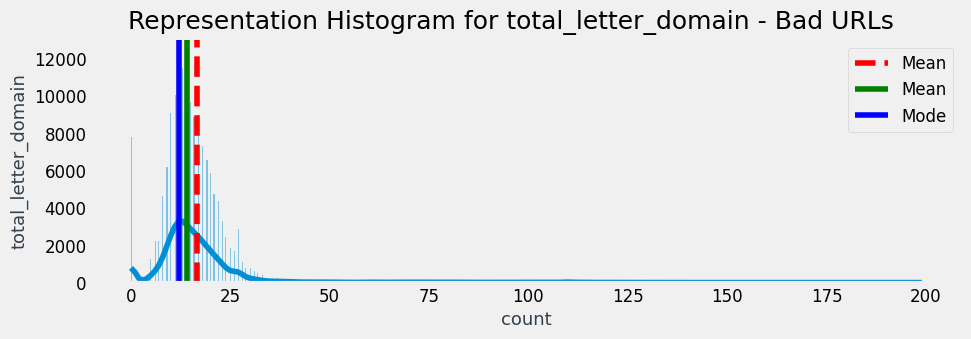

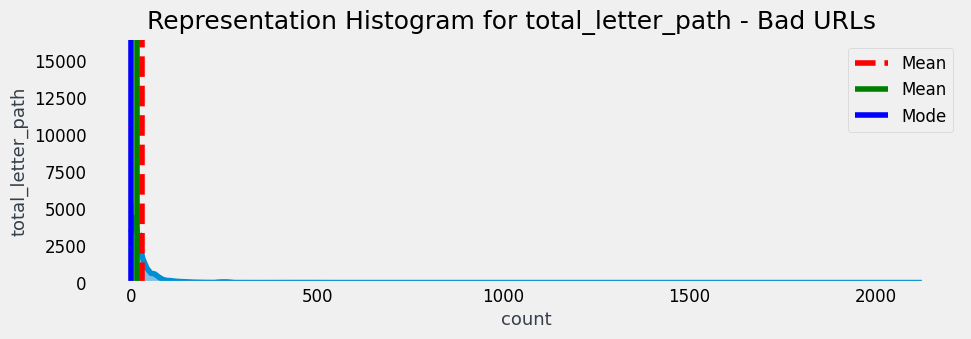

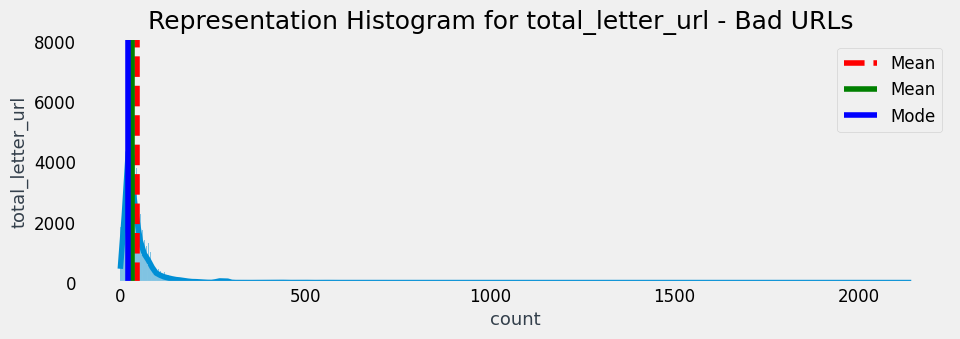

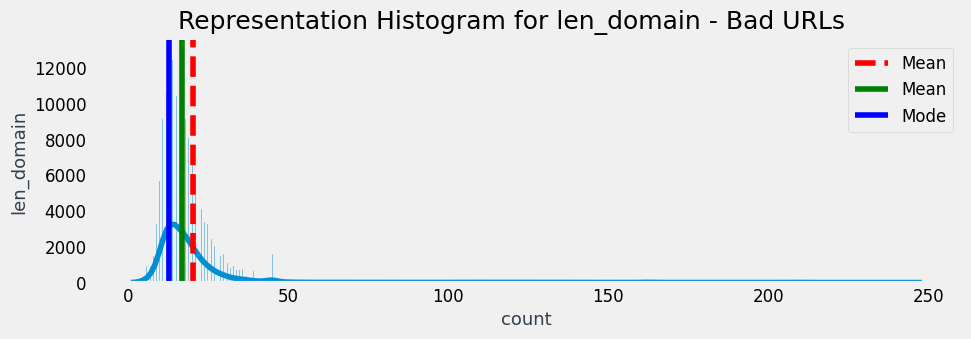

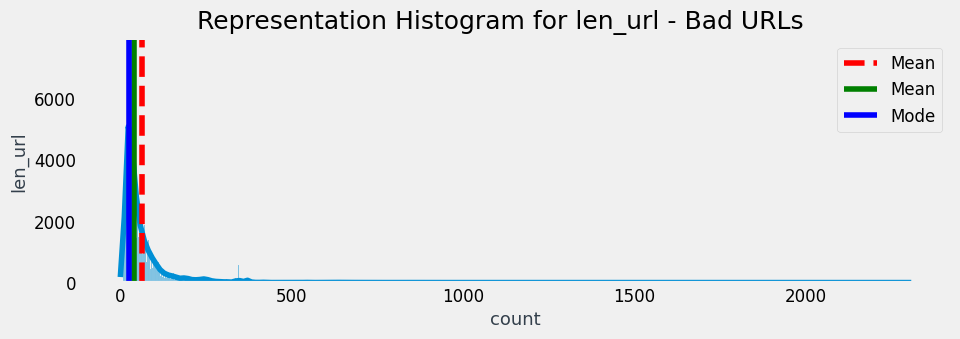

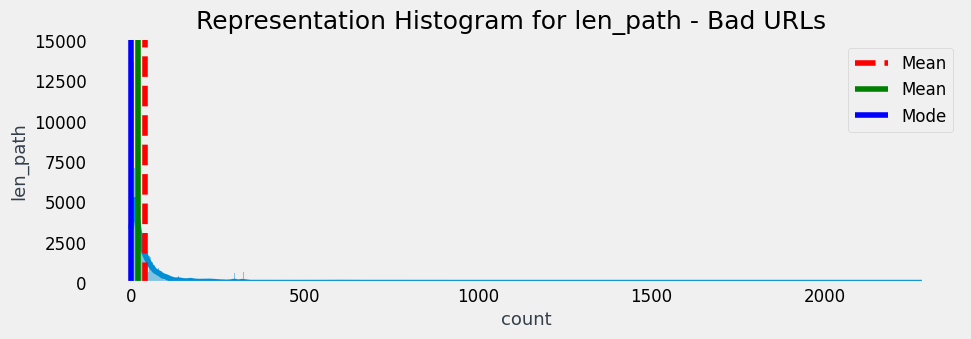

In [ ]:
get_histplot_central_tendency(data.query('Label == "bad"'), features, "Bad URLs")

In [ ]:
data.head()

,URL,Label,total_digits_domain,total_digits_path,total_digits_url,total_letter_domain,total_letter_path,total_letter_url,len_domain,len_url,len_path
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0,58,58,8,127,135,9,225,215
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,0,1,1,13,52,65,15,81,65
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0,47,47,15,96,111,16,177,160
3,mail.printakid.com/www.online.americanexpress....,bad,0,0,0,16,36,52,18,60,41
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0,21,21,18,64,82,19,116,96


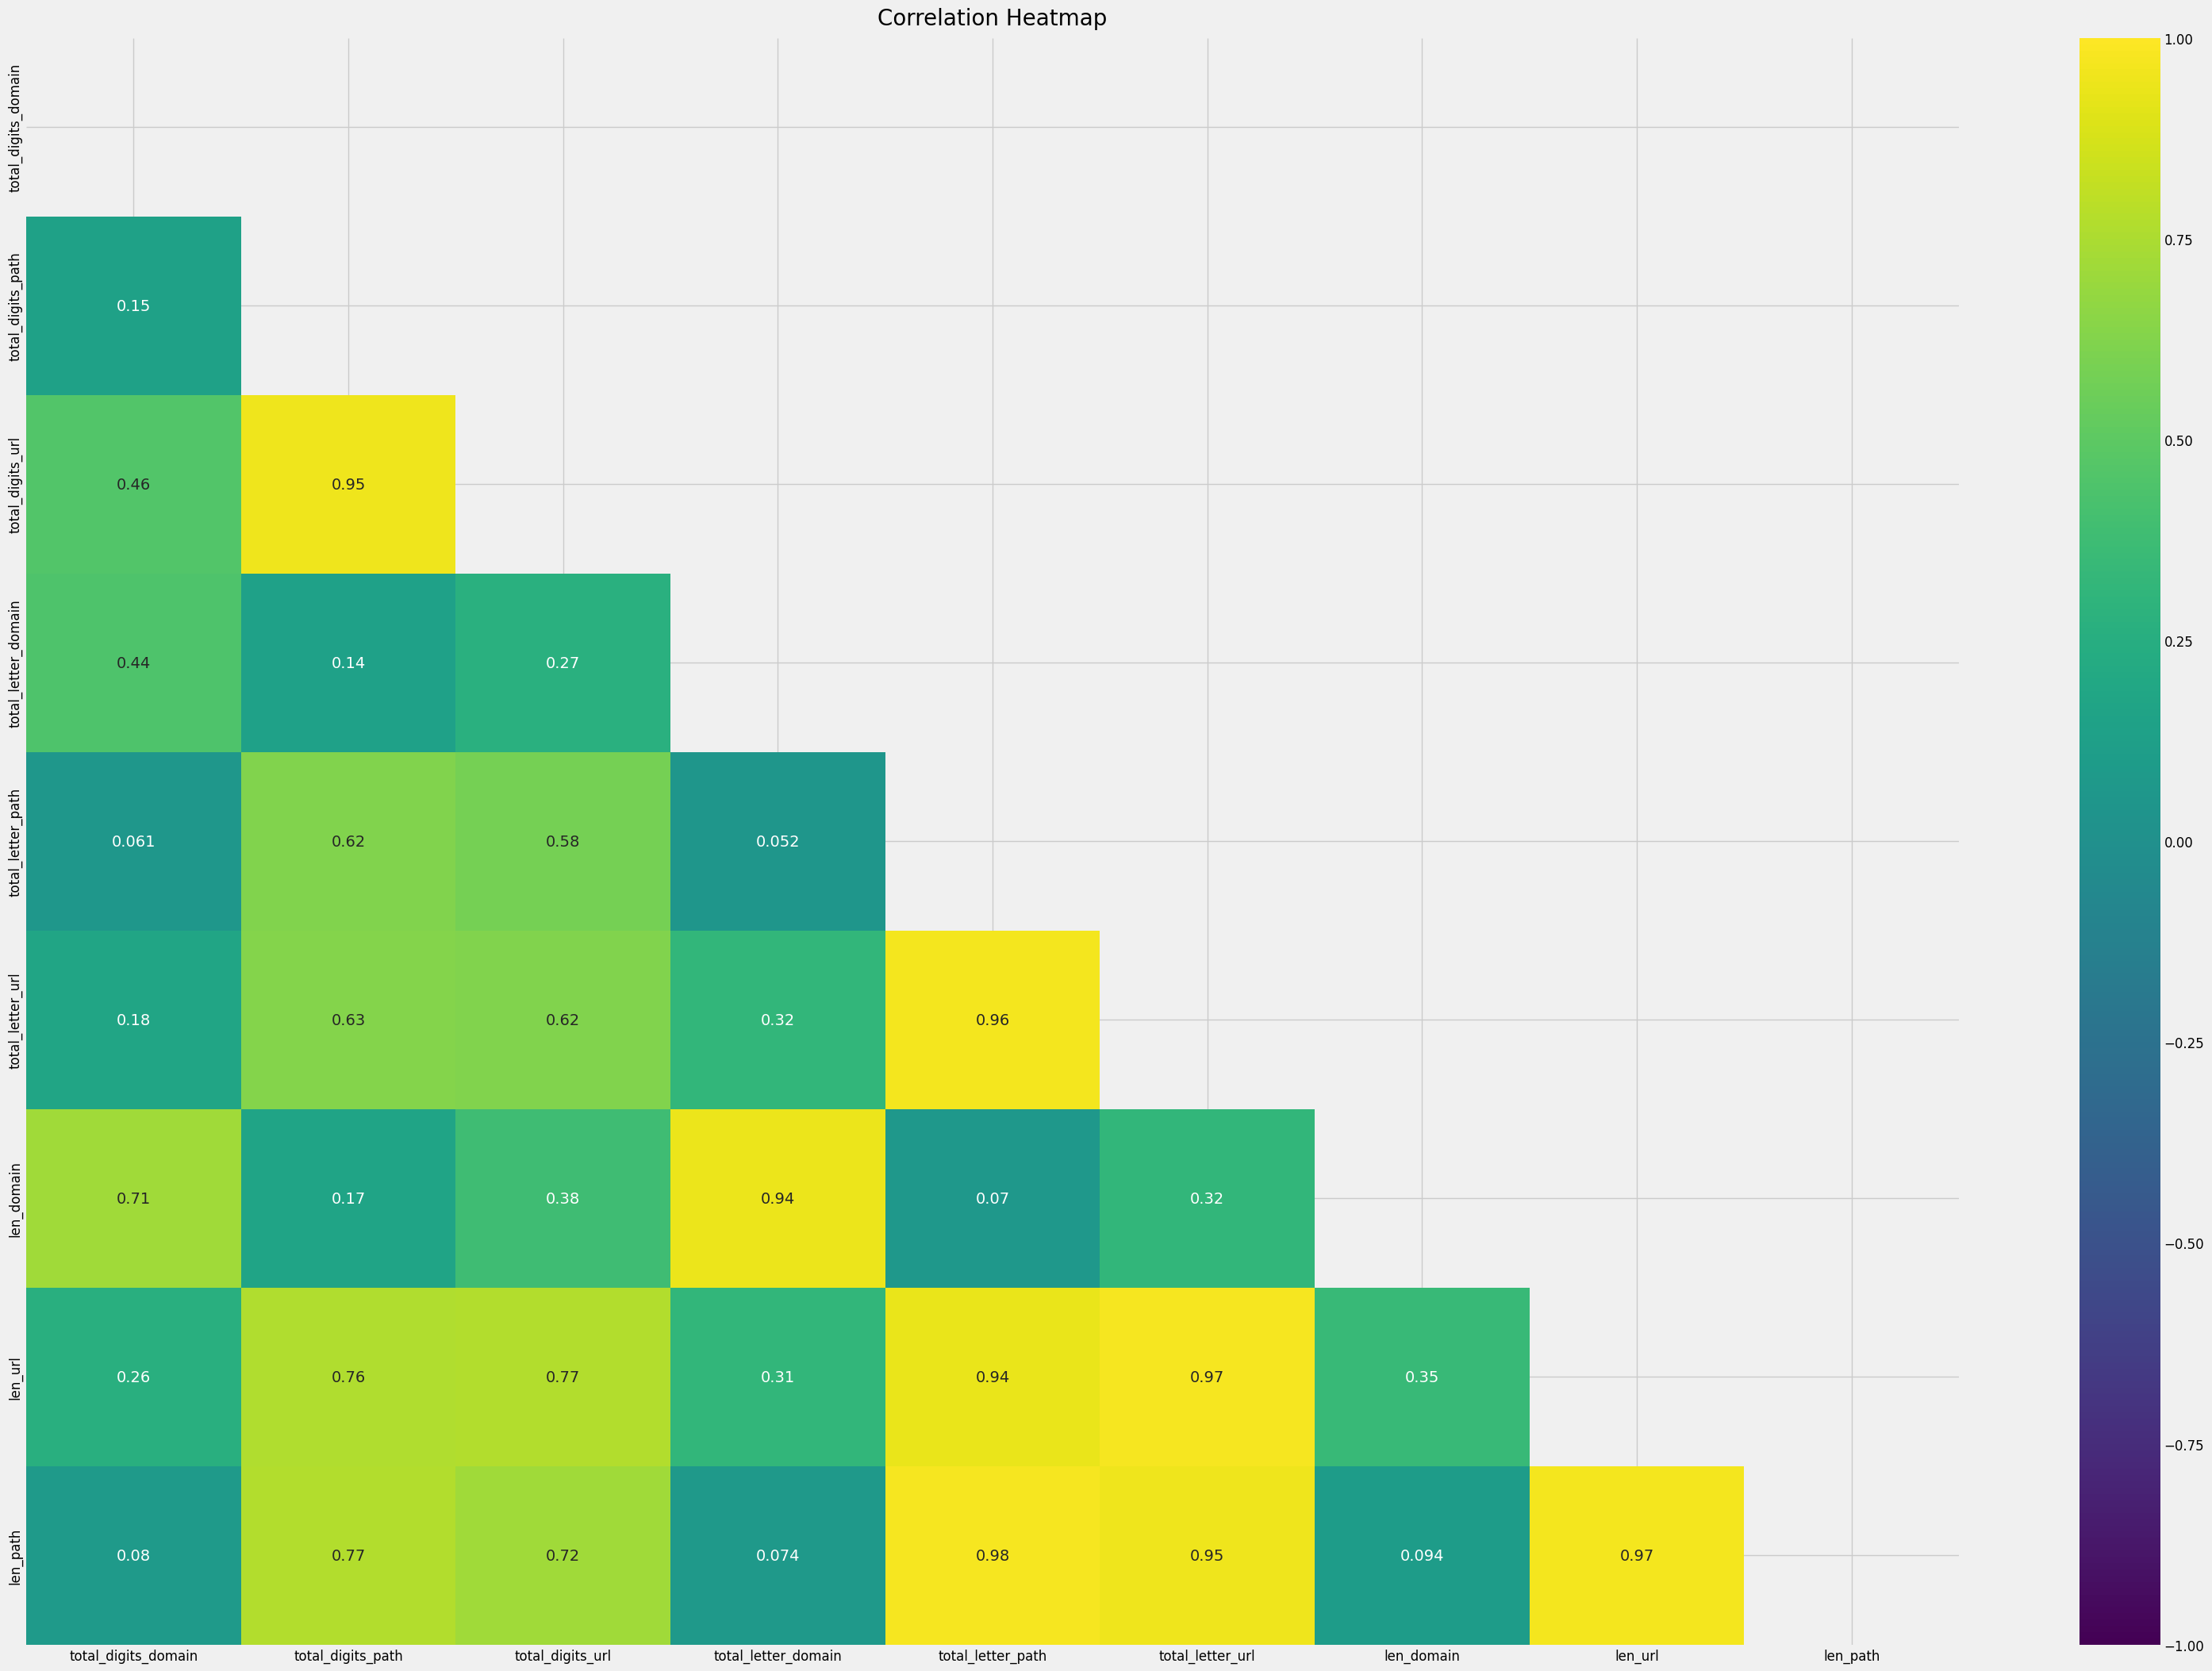

In [ ]:
plt.figure(figsize=(35, 25))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
corr = numerical_data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask = mask, vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
le = LabelEncoder()
data["Label"] = le.fit_transform(data["Label"])

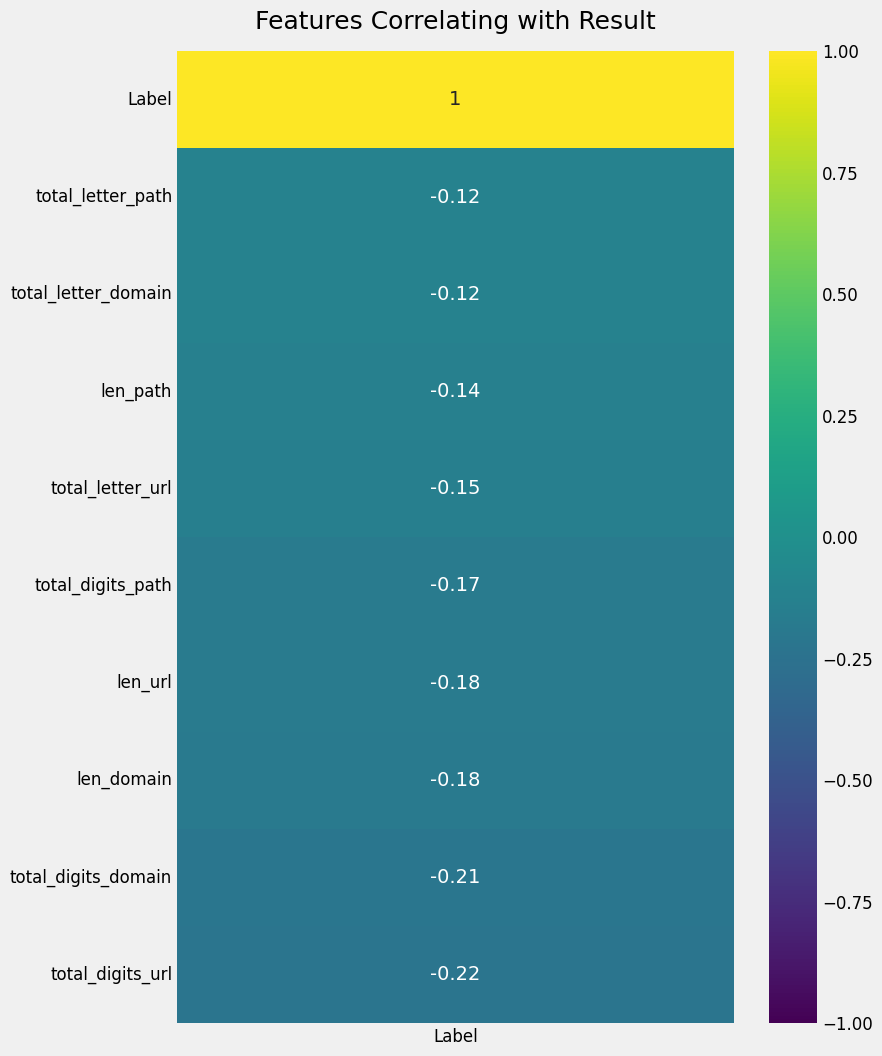

In [ ]:
plt.figure(figsize=(8, 12))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
heatmap = sns.heatmap(numerical_data.corr()[['Label']].sort_values(by='Label', ascending=False), vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize': 18}, pad=16)
plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

In [ ]:
X = data.drop(["URL", "Label"], axis=1)

In [ ]:
y = data["Label"]

In [ ]:
X

,total_digits_domain,total_digits_path,total_digits_url,total_letter_domain,total_letter_path,total_letter_url,len_domain,len_url,len_path
0,0,58,58,8,127,135,9,225,215
1,0,1,1,13,52,65,15,81,65
2,0,47,47,15,96,111,16,177,160
3,0,0,0,16,36,52,18,60,41
4,0,21,21,18,64,82,19,116,96
...,...,...,...,...,...,...,...,...,...
549341,11,0,11,0,0,0,14,15,0
549342,0,0,0,15,0,15,17,18,0
549343,0,0,0,14,0,14,16,17,0
549344,0,0,0,15,0,15,17,18,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, train_size=0.8)

In [ ]:
random_state = 42

In [ ]:
kfold = StratifiedKFold(n_splits=10)

In [ ]:
classifiers = []

In [ ]:
classifiers.append(AdaBoostClassifier(RandomForestClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [ ]:
cv_results = []

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create sample data (Ensure X_train and y_train exist)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = [
    AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=50, random_state=42), learning_rate=0.1, random_state=42), # Changed base_estimator to estimator
    RandomForestClassifier(n_estimators=100, random_state=42),
    ExtraTreesClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    MLPClassifier(random_state=42),
    LinearDiscriminantAnalysis(),
    LogisticRegression(max_iter=200, random_state=42)
]

# Define cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize dictionary to store results
cv_results = {}

# Perform cross-validation
for classifier in classifiers:
    classifier_name = classifier.__class__.__name__  # Get classifier name
    scores = cross_val_score(classifier, X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1)
    cv_results[classifier_name] = scores

# Print results
for model, scores in cv_results.items():
    print(f"{model}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

AdaBoostClassifier: Mean Accuracy = 0.8850, Std = 0.0094
RandomForestClassifier: Mean Accuracy = 0.8962, Std = 0.0075
ExtraTreesClassifier: Mean Accuracy = 0.8762, Std = 0.0199
GradientBoostingClassifier: Mean Accuracy = 0.9037, Std = 0.0166
MLPClassifier: Mean Accuracy = 0.8512, Std = 0.0245
LinearDiscriminantAnalysis: Mean Accuracy = 0.8688, Std = 0.0097
LogisticRegression: Mean Accuracy = 0.8750, Std = 0.0079


In [ ]:
# Define cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize list to store results  # changed here from {} to []
cv_results = []

# Perform cross-validation
for classifier in classifiers:
    classifier_name = classifier.__class__.__name__  # Get classifier name
    scores = cross_val_score(classifier, X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1)
    # append the results to a list instead of adding it to a dictionary
    cv_results.append([classifier_name, scores.mean()])

# Print results
# iterate through the list
for model, mean_score in cv_results:
    print(f"{model}: Mean Accuracy = {mean_score:.4f}")

AdaBoostClassifier: Mean Accuracy = 0.8850
RandomForestClassifier: Mean Accuracy = 0.8962
ExtraTreesClassifier: Mean Accuracy = 0.8762
GradientBoostingClassifier: Mean Accuracy = 0.9037
MLPClassifier: Mean Accuracy = 0.8512
LinearDiscriminantAnalysis: Mean Accuracy = 0.8688
LogisticRegression: Mean Accuracy = 0.8750


In [ ]:
cv_means = []
cv_std = []

In [ ]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    # cv_result is a list containing the model name and the mean score
    # access the mean score using index 1
    cv_means.append(cv_result[1])
    # Since we don't have individual scores, we cannot calculate std here.
    # You might want to store individual scores instead of just the mean in cv_results if you need std.
    # For now, appending 0 to cv_std as a placeholder
    cv_std.append(0)

In [ ]:
print(len(cv_means))
print(len(cv_std))
print(len(["AdaBoost", "RandomForest", "ExtraTrees", "GradientBoosting", "MultipleLayerPerceptron", "LinearDiscriminantAnalysis"]))

7
7
6


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, KFold

# Ensure X_train and y_train exist before proceeding
try:
    print(X_train.shape, y_train.shape)  # Debugging step
except NameError:
    print("Error: X_train or y_train is not defined. Make sure your training data is ready.")
    exit()

# Define classifiers
classifiers = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(),
    AdaBoostClassifier(n_estimators=100, random_state=42),
    ExtraTreesClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    LinearDiscriminantAnalysis()
]

classifier_names = [
    "RandomForest",
    "LogisticRegression",
    "AdaBoost",
    "ExtraTrees",
    "GradientBoosting",
    "MLPClassifier",
    "LinearDiscriminantAnalysis"
]

# Define cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
cv_results = []

# Perform cross-validation
for classifier in classifiers:
    scores = cross_val_score(classifier, X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1)
    cv_results.append(scores)

# Compute means and standard deviations
cv_means = [cv.mean() for cv in cv_results]
cv_std = [cv.std() for cv in cv_results]

# Create DataFrame with results
cv_res = pd.DataFrame({"CrossValMeans": cv_means, "CrossValErrors": cv_std, "Algorithm": classifier_names})

# Sort results by accuracy
cv_res = cv_res.sort_values(by="CrossValMeans", ascending=False)

# Display sorted results
print(cv_res)


(800, 20) (800,)
   CrossValMeans  CrossValErrors                   Algorithm
4        0.90375        0.016583            GradientBoosting
0        0.89625        0.007500                RandomForest
2        0.87625        0.012748                    AdaBoost
3        0.87625        0.019922                  ExtraTrees
1        0.87500        0.007906          LogisticRegression
6        0.86875        0.009682  LinearDiscriminantAnalysis
5        0.82250        0.015612               MLPClassifier


In [ ]:
RFC = RandomForestClassifier(n_estimators=100, random_state=42)
ABC = AdaBoostClassifier(n_estimators=100, random_state=42)
ETC = ExtraTreesClassifier(n_estimators=100, random_state=42)
GBC = GradientBoostingClassifier(n_estimators=100, random_state=42)
MLP = MLPClassifier(max_iter=500, random_state=42)
LDA = LinearDiscriminantAnalysis()
LR = LogisticRegression(max_iter=500)

In [ ]:
rf_param_grid = {
              "max_features": [3, 10, 20],
              "n_estimators" :[100,300, 500],
              "criterion": ["gini", "entropy"]}

In [ ]:
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

In [ ]:
gsRFC.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [3, 10, 20],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy', verbose=1)

In [ ]:
RFC_best = gsRFC.best_estimator_

In [ ]:
gsRFC.best_score_

np.float64(0.9112499999999999)

In [ ]:
gsRFC.best_params_

{'criterion': 'entropy', 'max_features': 20, 'n_estimators': 500}

In [ ]:
def plot_learning_curve(estimator, title, X, y, save, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig(save, dpi=300, bbox_inches='tight')
    return plt


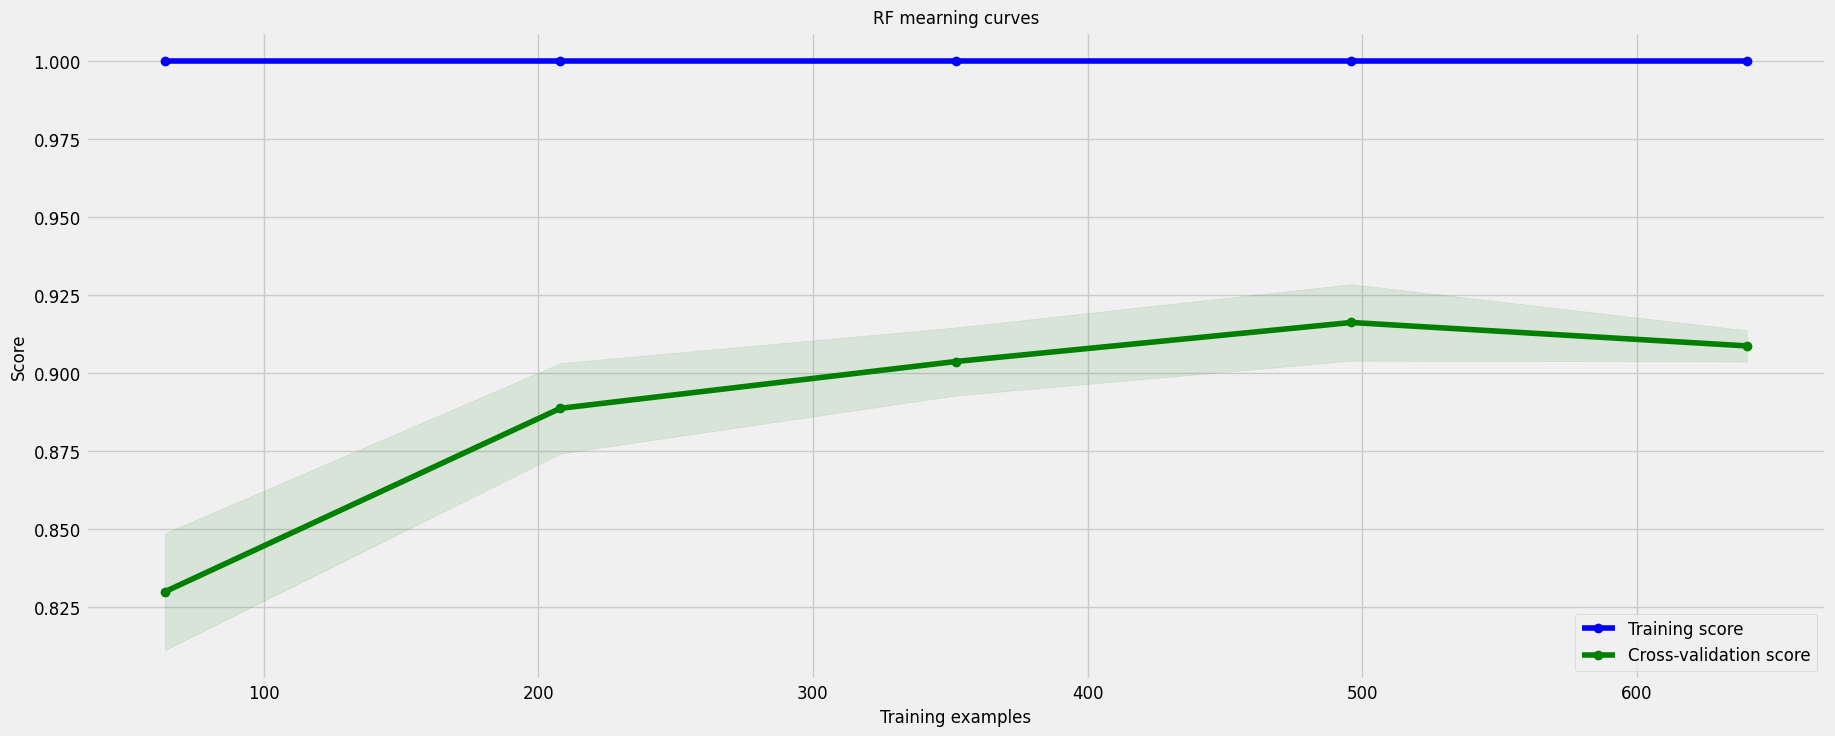

In [ ]:
g1 = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,y_train,cv=kfold, save = 'RFLearningPlot')

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42) # Changed max_iter to n_estimators
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

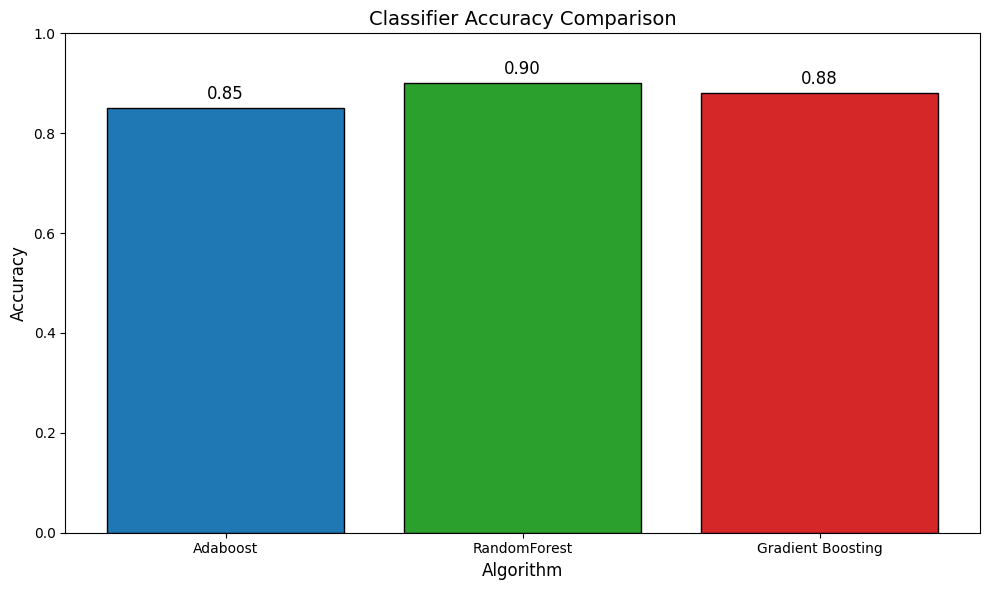

In [ ]:
import matplotlib.pyplot as plt
algorithms = ["Adaboost", "RandomForest", "Gradient Boosting"]
accuracies = [0.85, 0.90, 0.88]

plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, accuracies, color=['#1f77b4', '#2ca02c', '#d62728'], edgecolor='black')
plt.xlabel("Algorithm", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Classifier Accuracy Comparison", fontsize=14)
plt.ylim(0, 1)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
Classifier=VotingClassifier(estimators=[('ada',ada),('rf',rf),('gb',gb)],voting='hard')
Classifier.fit(X_train,y_train)

VotingClassifier(estimators=[('ada',
                              AdaBoostClassifier(n_estimators=100,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier())])

In [ ]:
predictions = Classifier.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, matthews_corrcoef # Import the necessary modules

print("f1 score:",f1_score(y_test,predictions,average='weighted'))
print("Accuracy: ",100.0 *accuracy_score(y_test,predictions))
print("Matthews correlation coefficient:",matthews_corrcoef(y_test,predictions))

f1 score: 0.9100540054005402
Accuracy:  91.0
Matthews correlation coefficient: 0.8265588651337246


<Axes: >

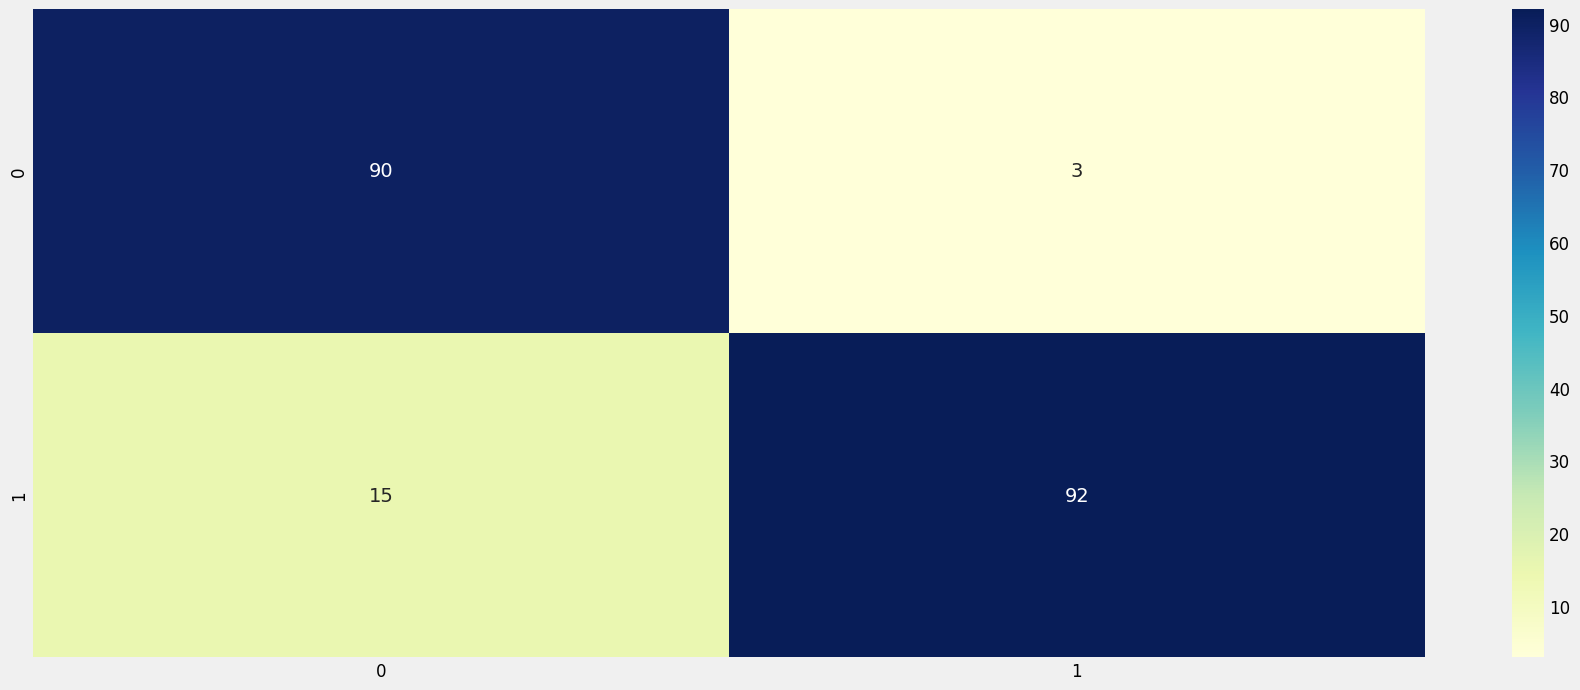

In [ ]:
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
Classifier=VotingClassifier(estimators=[('ada',ada),('rf',rf),('gb',gb)],voting='soft')
Classifier.fit(X_train,y_train)

VotingClassifier(estimators=[('ada',
                              AdaBoostClassifier(n_estimators=100,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [ ]:
predictions = Classifier.predict(X_test)

In [ ]:
print("f1 score:",f1_score(y_test,predictions,average='weighted'))
print("Accuracy: ",100.0 *accuracy_score(y_test,predictions))
print("Matthews correlation coefficient:",matthews_corrcoef(y_test,predictions))

f1 score: 0.8950866444950114
Accuracy:  89.5
Matthews correlation coefficient: 0.7953860910462723


<Axes: >

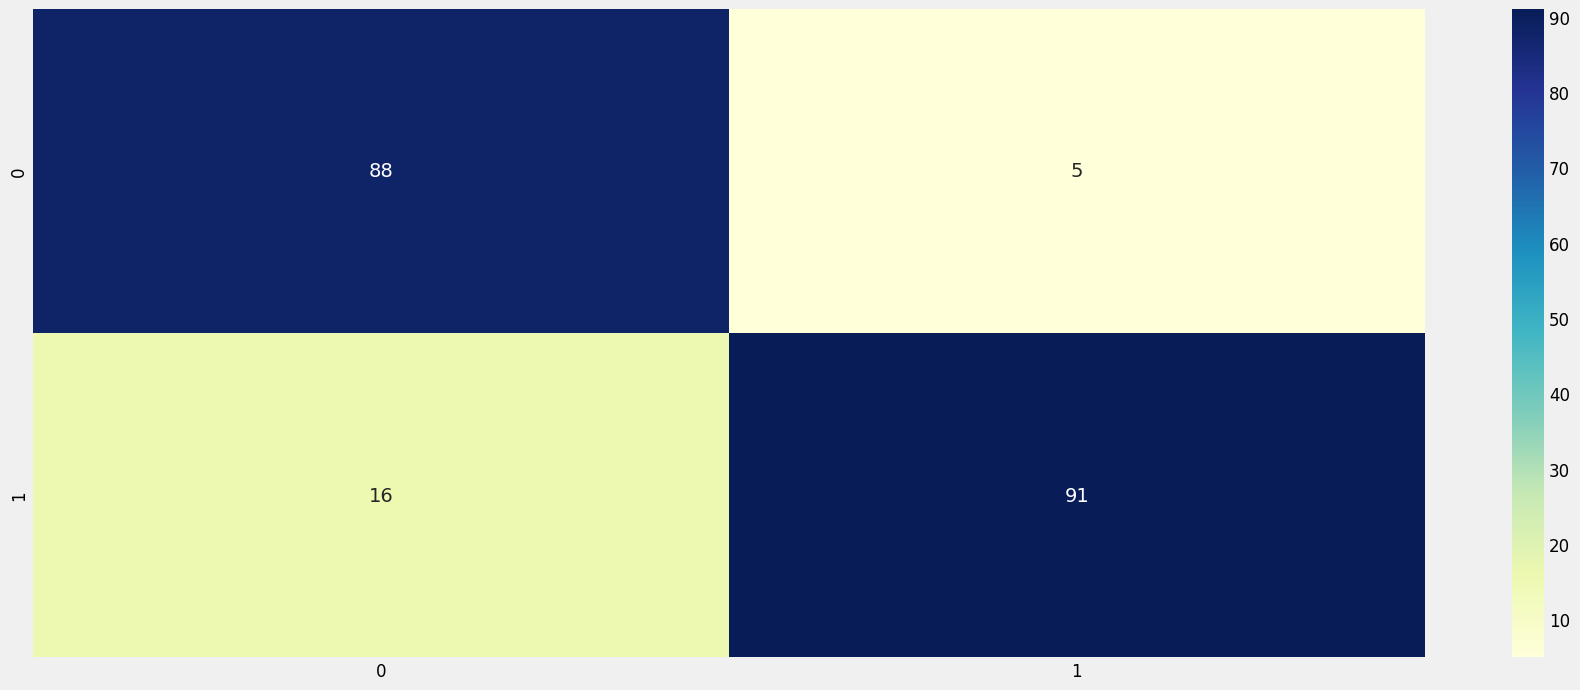

In [ ]:
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
!pip install tldextract

import tldextract
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('Dataset.csv')

# Digit and letter counters
def count_digits(string):
    return sum(c.isdigit() for c in string)

def count_letter(string):
    return sum(c.isalpha() for c in string)

# Feature extractor
def extract_features(url):
    url_split = url.split("/", 1)
    domain, path = url_split[0], url_split[1] if len(url_split) == 2 else ""
    return {
        "total_digits_domain": count_digits(domain),
        "total_digits_path": count_digits(path),
        "total_digits_url": count_digits(url),
        "total_letter_domain": count_letter(domain),
        "total_letter_path": count_letter(path),
        "total_letter_url": count_letter(url),
        "len_domain": len(domain),
        "len_path": len(path),
        "len_url": len(url)
    }

# Feature extraction
data['features'] = data['URL'].apply(extract_features)
X = pd.DataFrame(list(data['features']))

# Encode labels
label_encoder = LabelEncoder() # Define the LabelEncoder
y = label_encoder.fit_transform(data["Label"])  # "good" -> 1, "bad" -> 0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the VotingClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
Classifier = VotingClassifier(estimators=[('ada', ada), ('rf', rf), ('gb', gb)], voting='soft') # Define Classifier here
Classifier.fit(X_train, y_train) # Train the classifier

VotingClassifier(estimators=[('ada',
                              AdaBoostClassifier(n_estimators=100,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

In [ ]:
def predict_url(url, le=label_encoder): # Pass the LabelEncoder as an argument
    features = extract_features(url)
    features_df = pd.DataFrame([features])
    result = Classifier.predict(features_df)[0]
    label = le.inverse_transform([result])[0]  # Convert 1/0 back to 'good'/'bad'
    return "Legit (good)" if label == "good" else "Phishing (bad)"

In [ ]:
print(predict_url("http://login-paypal.secureverify.com"))

Phishing (bad)


In [ ]:
print(predict_url("https://www.google.com/"))

Legit (good)
